# Analysis of Accidents Reported on Twitter 
### By **Néstor Suat** in 2021

**Descripción:** Explorando los datos recolectados en twitter sobre reportes de accidentes

### Librerías

In [1]:
import pandas as pd
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs

from shapely.geometry import Point

import warnings
warnings.filterwarnings('ignore')

## Dataset

### Dataset con los accidentes

In [181]:
#dir_ = "../../data/database/output_ml/M1/NER_extractor/"
#file = 'accident_tweets_lat_lon_3_months_bogota.tsv'
dir_ = "../../data/database//"
file = 'historico_accidentes-oct-dic.tsv'
accidentes = pd.read_csv(dir_+file, delimiter = "\t", quoting = 3)
#accidentes = accidentes[(accidentes['created_at'] >= '2018-12-01') & (accidentes['created_at'] < '2019-01-01')]
accidentes.head(3)

,Unnamed: 0,OBJECTID,FORMULARIO,CODIGO_ACCIDENTE,ANO_OCURRENCIA_ACC,DIRECCION,GRAVEDAD,CLASE_ACC,LOCALIDAD_GEO,LOCALIDAD,FECHA_HORA_ACC,CIV,PK_CALZADA,geometry,lat,lon
0,0,2426,A000873170,10462198,2018,KR 98A-CL 140 01,CON MUERTOS,CHOQUE,SUBA,SUBA,2018-10-01T10:46:00+00:00,11004833.0,7423.0,POINT (-74.09044835399999 4.740686878844433),4.740687,-74.090448
1,1,2577,A000874015,10463499,2018,DG 92-TR 23 2,CON HERIDOS,ATROPELLO,CHAPINERO,USAQUEN,2018-10-05T22:25:00+00:00,50006921.0,50014747.0,POINT (-74.05786852999995 4.679713927846428),4.679714,-74.057869
2,2,2578,A000868058,10463513,2018,CL 24C-KR 80A 2,CON HERIDOS,ATROPELLO,FONTIBON,FONTIBON,2018-10-13T03:22:00+00:00,9003061.0,222977.0,POINT (-74.11904655299998 4.66770658584681),4.667707,-74.119047


In [182]:
accidentes.shape

(8146, 16)

### Geopandas con los datos de referencia de las localidades en Bogotá

In [183]:
localidades = gpd.read_file('maps/locashp/Loca.shp')
#'maps/munishp/Muni.shp'
#'maps/calzadashp/Calzada.shp'
#'maps/upla/UPla.shp'
#localidades = localidades[localidades['LocCodigo'] != '20'] ## Descartando sumapaz
localidades.head(5)

,LocNombre,LocAAdmini,LocArea,LocCodigo,SHAPE_Leng,SHAPE_Area,geometry
0,ANTONIO NARIÑO,Acuerdo 117 de 2003,4.879543e+06,15,0.108973,0.000397,"POLYGON ((-74.13075 4.59335, -74.12917 4.59327..."
1,TUNJUELITO,Acuerdo 117 de 2003,9.910940e+06,06,0.210542,0.000807,"POLYGON ((-74.13777 4.59489, -74.13165 4.59363..."
2,RAFAEL URIBE URIBE,Acuerdo 117 de 2003,1.383408e+07,18,0.174513,0.001126,"POLYGON ((-74.12803 4.59254, -74.12777 4.59233..."
3,CANDELARIA,Acuerdo 117 de 2003,2.060243e+06,17,0.067158,0.000168,"POLYGON ((-74.06621 4.60317, -74.06620 4.60317..."
4,BARRIOS UNIDOS,Acuerdo 8 de 1977,1.190345e+07,12,0.121180,0.000969,"POLYGON ((-74.05725 4.68684, -74.06249 4.65594..."


## Creando un Geopandas de accidentes

Primero, para poder graficar los puntos o tenerlos en cuenta con la librería geoplot se requiere construir la geometría.

In [184]:
points = accidentes.apply(
    lambda srs: Point(float(srs['lon']), float(srs['lat'])),
    axis='columns'
)
points

0       POINT (-74.09044835399999 4.740686878844433)
1       POINT (-74.05786852999995 4.679713927846428)
2        POINT (-74.11904655299998 4.66770658584681)
3       POINT (-74.14508758599999 4.561278719850281)
4        POINT (-74.11143900799993 4.54826752885067)
                            ...                     
8141    POINT (-74.03813906499994 4.679898197846395)
8142    POINT (-74.11068994799996 4.708711887845451)
8143     POINT (-74.10060400099997 4.65698865884713)
8144    POINT (-74.13686577199996 4.597026840849105)
8145    POINT (-74.08465833999998 4.679335357846423)
Length: 8146, dtype: object

Segundo, se crea un dataframe de geopandas estableciendo la columna geometry con los puntos construidos anteriormente.

In [185]:
gpd_accidentes = gpd.GeoDataFrame(accidentes, geometry=points)
gpd_accidentes.head(2)

,Unnamed: 0,OBJECTID,FORMULARIO,CODIGO_ACCIDENTE,ANO_OCURRENCIA_ACC,DIRECCION,GRAVEDAD,CLASE_ACC,LOCALIDAD_GEO,LOCALIDAD,FECHA_HORA_ACC,CIV,PK_CALZADA,geometry,lat,lon
0,0,2426,A000873170,10462198,2018,KR 98A-CL 140 01,CON MUERTOS,CHOQUE,SUBA,SUBA,2018-10-01T10:46:00+00:00,11004833.0,7423.0,POINT (-74.09045 4.74069),4.740687,-74.090448
1,1,2577,A000874015,10463499,2018,DG 92-TR 23 2,CON HERIDOS,ATROPELLO,CHAPINERO,USAQUEN,2018-10-05T22:25:00+00:00,50006921.0,50014747.0,POINT (-74.05787 4.67971),4.679714,-74.057869


## Kernel Denisty Estimation

Para realizar la estimación de densidad de kernel se usa la librería geoplot

### Geolocalización de accidentes

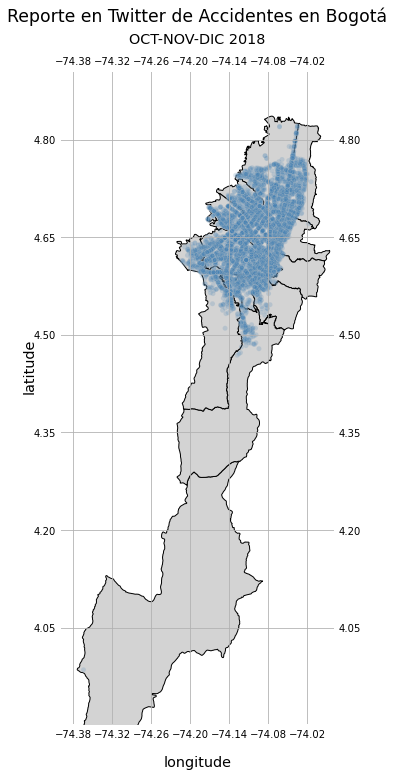

In [186]:
ax = gplt.polyplot(localidades,projection=gcrs.PlateCarree(),facecolor='lightgray', figsize=(12, 12))


gplt.pointplot(gpd_accidentes,edgecolor='lightgray', linewidth=0.5, alpha=0.2,ax=ax)
#ax.set_title('Reporte en Twitter de Accidentes en Bogotá')
#ax.set_xlabel('lon')
#ax.set_ylabel('lat');
ax.gridlines(draw_labels=True)
ax.set_xlabel('lon')
ax.set_ylabel('lat');
ax.text(-0.09, 0.55, 'latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',fontsize='x-large',
        transform=ax.transAxes)
ax.text(0.5, -0.07,'longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',fontsize='x-large',
        transform=ax.transAxes)
ax.text(0.5, 1.1,'Reporte en Twitter de Accidentes en Bogotá', va='top', ha='center',
        rotation='horizontal', rotation_mode='anchor', fontsize='xx-large',
        transform=ax.transAxes)
ax.text(0.5, 1.06,'OCT-NOV-DIC 2018', va='top', ha='center',
        rotation='horizontal', rotation_mode='anchor', fontsize='x-large',
        transform=ax.transAxes)
fig = ax.get_figure()
fig.savefig("hist-test.png")

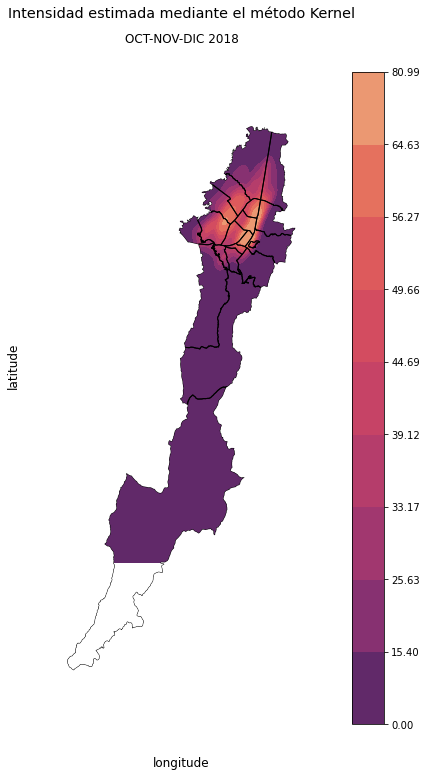

In [187]:
ax = gplt.kdeplot(
    gpd_accidentes, 
    cmap='flare_r', 
    shade=True, 
    shade_lowest=True, 
    clip=localidades, 
    kernel="epanechnikov",
    bw_adjust=1,
    levels=10,
    cbar=True,
    projection=gcrs.PlateCarree(),
    figsize=(12, 12)
)

gplt.polyplot(localidades, ax=ax,zorder=1)

#ax.gridlines(draw_labels=True)
ax.text(-0.09, 0.55, 'latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',fontsize='large',
        transform=ax.transAxes)
ax.text(0.5, -0.07,'longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',fontsize='large',
        transform=ax.transAxes)
ax.text(0.5, 1.1,'Intensidad estimada mediante el método Kernel', va='top', ha='center',
        rotation='horizontal', rotation_mode='anchor', fontsize='x-large',
        transform=ax.transAxes)
ax.text(0.5, 1.06,'OCT-NOV-DIC 2018', va='top', ha='center',
        rotation='horizontal', rotation_mode='anchor', fontsize='large',
        transform=ax.transAxes)
fig = ax.get_figure()
fig.savefig("kde-test.png")

In [25]:
import folium

In [148]:
locations = accidentes[['lat','lon']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[7]

[4.64798885, -74.15665899999998]

In [149]:
from folium import plugins

map = folium.Map(location = [4.645985, -74.097766], tiles='Stamen Terrain', zoom_start = 12)

heat_data = [[point.xy[1][0], point.xy[0][0]] for point in gpd_accidentes.geometry ]

heat_data
plugins.HeatMap(heat_data).add_to(map)

map